## Tarea 3 - Física Computacional
**Román Tamez Vidal Tamayo Tamez** - (tamoaltas)

In [2]:
import math as m
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

In [3]:
import matplotlib
# Para el formato de las gráficas
matplotlib.rcParams.update(
    {
        "font.family": "serif",
        "text.usetex": True,
        "pgf.rcfonts": False,
        "axes.unicode_minus": False,
        "font.size": 12,
        "pgf.preamble": "\n".join([ # Aún más formato
        r"\usepackage[utf8]{inputenc}",
        r"\usepackage[T1]{fontenc}",
        ])
    }
)

### Problema 1:
Implementación de métodos de integración

Realice un notebook en el que se expliquen y programen los siguientes algoritmos de integración de ecuaciones diferenciales:

- **Método de Euler**
- **Serie de Taylor de segundo orden**
- **Runge-Kutta de segundo orden**
- **Runge-Kutta de cuarto orden**

Verifique el funcionamiento de sus integradores encontrando la solución de la siguiente ecuación diferencial para $ x(t) $:

$$
\ddot{x} + 0.5 \dot{x} + \sin x = e^{-t} (\sin(3t) + \cos(2t))
$$

Con condiciones iniciales $ \dot{x}(0) = 1 $ y $ x(0) = 0 $.

El jacobiano del sistema es:
$$
\mathbb{J} = \left( \begin{array}{c c}
0 & 1 \\
-\cos{(x)} & -0.5
\end{array}\right)
$$

In [27]:
def edo_1(t, y):
    # y = [x, v] donde v = dx/dt
    x, v = y
    dvdt = -0.5 * v - np.sin(x) + np.exp(-t) * (np.sin(3*t) + np.cos(2*t))
    return np.array([v, dvdt])

J_1 = np.zeros((2,2))
J_1[0,1], J_1[1,1] = 1, -0.5
def jacob_1(y):
    x, v = y
    J_1[1,0] = -np.cos(x)
    return J_1

#### Método de Euler

In [28]:
def integrar_euler(f, t0, y0, tf, h):
    """
    Integra la EDO usando el método de Euler.
    f: función que define el sistema
    t0: tiempo inicial
    y0: condiciones iniciales
    tf: tiempo final
    h: tamaño de paso
    """
    t_values = np.arange(t0, tf, h)
    y_values = np.zeros((len(t_values), len(y0)))
    y_values[0] = y0

    for i in range(1, len(t_values)):
        y_values[i] = y_values[i-1] + h*f(t_values[i-1], y_values[i-1])
    
    return t_values, y_values

#### Método de Taylor

In [ ]:
def integrar_taylor(f,jacob, t0, y0, tf, h):
    """
    Integra la EDO usando el método de Taylor.
    f: función que define el sistema
    jacob: jacobiana del sistema
    t0: tiempo inicial
    y0: condiciones iniciales
    tf: tiempo final
    h: tamaño de paso
    """
    t_values = np.arange(t0, tf, h)
    y_values = np.zeros((len(t_values), len(y0)))
    y_values[0] = y0
    
    for i in range(1, len(t_values)):
        eval_edo = f(t_values[i-1], y_values[i-1]) # Se calculan [x, v]
        y_values[i] = y_values[i-1] + h*eval_edo + 0.5 * h**2 * np.dot(jacob(y_values[i-1]),eval_edo)
    
    return t_values, y_values

#### Método de Runge-Kutta de segundo orden

In [ ]:
def integrar_RK2(f, t0, y0, tf, h):
    """
    Integra la EDO usando el método de Runge-Kutta de segundo orden.
    f: función que define el sistema
    t0: tiempo inicial
    y0: condiciones iniciales
    tf: tiempo final
    h: tamaño de paso
    """
    t_values = np.arange(t0, tf, h)
    y_values = np.zeros((len(t_values), len(y0)))
    y_values[0] = y0

    for i in range(1, len(t_values)):
        t, y = t_values[i-1], y_values[i-1]
        # Kuttas
        k1 = f(t, y)
        # Runges
        y_values[i] = y + h*f(t+h/2 ,y + (h/2)*k1)

    return t_values, y_values

#### Método de Runge-Kutta de cuarto orden

In [ ]:
def integrar_RK4(f, t0, y0, tf, h):
    """
    Integra la EDO usando el método de Runge-Kutta de cuarto orden.
    f: función que define el sistema
    t0: tiempo inicial
    y0: condiciones iniciales
    tf: tiempo final
    h: tamaño de paso
    """
    t_values = np.arange(t0, tf, h)
    y_values = np.zeros((len(t_values), len(y0)))
    y_values[0] = y0

    for i in range(1, len(t_values)):
        t, y = t_values[i-1], y_values[i-1]
        # Kuttas
        k1 = f(t        , y)
        k2 = f(t + 0.5*h, y + 0.5*h*k1)
        k3 = f(t + 0.5*h, y + 0.5*h*k2)
        k4 = f(t +     h, y +     h*k3)
        # Runges
        y_values[i] = y + h*f(t+h/2 ,y + (h/6)*(k1+2*k2+2*k3+k4))

    return t_values, y_values

In [63]:
# Condiciones iniciales
t0, tf = 0, 10  # Tiempo inicial y final
h = 0.05  # Paso de tiempo
y0 = np.array([0, 1])  # x(0) = 0, v(0) = 1

# Integración
t_values_a, y_values_a = integrar_euler(edo_1, t0, y0, tf, h)
t_values_b, y_values_b = integrar_taylor(edo_1, jacob_1,t0, y0, tf, h)
t_values_c, y_values_c = integrar_RK2(edo_1,t0, y0, tf, h)
t_values_d, y_values_d = integrar_RK4(edo_1,t0, y0, tf, h)

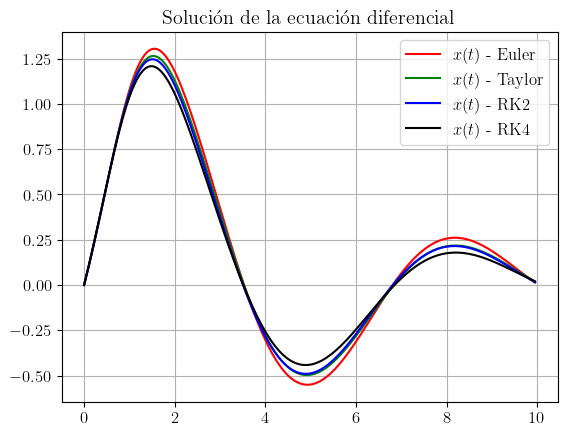

In [ ]:
plt.plot(t_values_a, y_values_a[:, 0], label=r'$x(t)$ - Euler', color='r')
plt.plot(t_values_b, y_values_b[:, 0], label=r'$x(t)$ - Taylor', color='g')
plt.plot(t_values_c, y_values_c[:, 0], label=r'$x(t)$ - RK2', color='b')
plt.plot(t_values_d, y_values_d[:, 0], label=r'$x(t)$ - RK4', color='k')

plt.title('Solución de la ecuación diferencial 1')
plt.legend(), plt.grid()
plt.show()

### Problema 2:


Utilizando los integradores anteriores, encuentre un paso que asegure que la solución tenga por lo menos 4 cifras significativas en el resultado de integración. La ecuación diferencial es la siguiente:

$$ 
\dddot y + \ddot{y}^2 - 3\dot{y}^3 + \cos^2 y = e^{-t} \sin(3t) 
$$

Con condiciones iniciales $ \ddot{y}(1) = 1, \quad \dot{y}(1) = 2, \quad y(1) = 1 $. En particular, describa lo que sucede en el intervalo $t \in [1, 1.65] $ y analice el comportamiento cuando $t \to 2$.


In [ ]:
def edo_2(t, y):
    # y = [x, v, a] donde v = dx/dt, a = dv/dt
    x, v, a = y
    dadt = -a**2 + 3*v**3 - np.cos(x)**2 + np.exp(-t) * np.sin(3*t)
    return np.array([v, a, dadt])

#### Buscador de $h$

In [129]:
def checar_cifras_o_diff(a,b,n=4):
    '''
    Checa si dos números coinciden en las primeras n cifras o
    si su diferencia es menor a 1e-n
    '''
    diff = abs(a-b)
    return (diff/(a+1e-20) <= 10**(-n) or diff <= 10**(-n))

def comp_elementos(a, b, comp_func):
    '''
    Compara 1 a 1 los elementos a[i][j], b[i][j] con una función 
    de comparación dada

    Regresa 'True' si todo elemento cumple con la condición y 'False' si no.
    '''
    for i in range(min(len(a),len(b))):
        for (val_a, val_b) in zip(a[i], b[i]):
            if not comp_func(val_a, val_b): 
                return False
    return True

In [282]:
def obtener_h_integrador(inter, comp_func, h0):
    """
    Obtiene una h de forma que las soluciones de un integrador con paso
    h/2 y uno con paso h coincidan según una función de comparación
    'comp_func'.
    inter: función del integrador que toma como argumento h
    comp_func: función de comparación
    h0: primer valor a tratar de h
    """
    t_old, y_old = inter(h0)
    h = h0*0.5
    
    for i in range(1, 100):
        if h < 1e-8:
            break # Salida por si acaso

        print('Paso:',i,'\t h:', h)
        t, y = inter(h)

        # Se transponen las soluciones obtenidas por el integrador
        sols_old = [col for col in y_old.T]
        sols = [col[0::2] for col in y.T] # Se toman valores cada dos puntos
        print(len(sols_old[0]), len(sols[0]))
        if comp_elementos(sols_old, sols, comp_func): return t, y, h
            
        h = h*0.5
        y_old = y
        
    print('Algo salió mal.')
    return None, None, None

#### Soluciones de la segunda ec. diferencial

In [280]:
t0, tf = 1,1.65 # Tiempo inicial y final
y0 = np.array([1, 2, 1])  # x(1) = 1, v(1) = 2, a(1) = 1

t_2, y_2, h_2 = obtener_h_integrador(lambda h: integrar_RK4(edo_2,t0, y0, tf, h), checar_cifras_o_diff, 0.1)

Paso: 1 	 h: 0.05
Paso: 2 	 h: 0.025
Paso: 3 	 h: 0.0125
Paso: 4 	 h: 0.00625
Paso: 5 	 h: 0.003125
Paso: 6 	 h: 0.0015625
Paso: 7 	 h: 0.00078125
Paso: 8 	 h: 0.000390625
Paso: 9 	 h: 0.0001953125
Paso: 10 	 h: 9.765625e-05
Paso: 11 	 h: 4.8828125e-05
Paso: 12 	 h: 2.44140625e-05
Paso: 13 	 h: 1.220703125e-05
Paso: 14 	 h: 6.103515625e-06
Paso: 15 	 h: 3.0517578125e-06


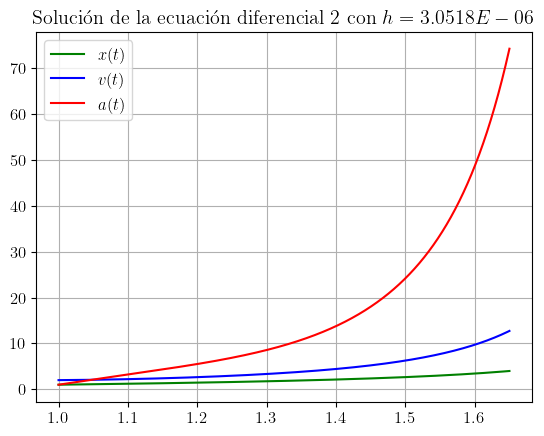

In [229]:
plt.plot(t_2, y_2[:, 0], label=r'$x(t)$', color='g')
plt.plot(t_2, y_2[:, 1], label=r'$v(t)$', color='b')
plt.plot(t_2, y_2[:, 2], label=r'$a(t)$', color='r')

plt.title('Solución de la ecuación diferencial 2 con $h={:.4E}$'.format(h_2))
plt.legend(), plt.grid()
plt.show()

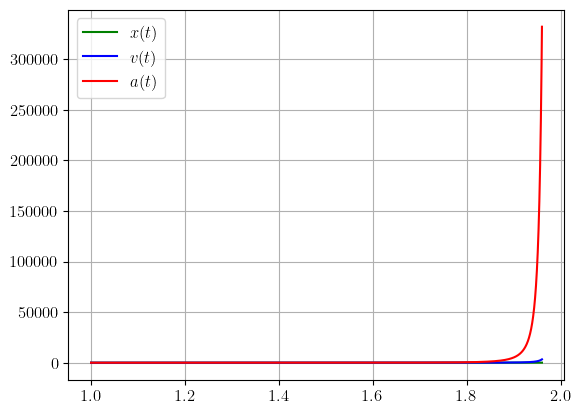

In [237]:
t0, tf = 1,1.96 # Tiempo inicial y final
t_2a, y_2a = integrar_RK4(edo_2,t0, y0, tf, h_2)

plt.plot(t_2a, y_2a[:, 0], label=r'$x(t)$', color='g')
plt.plot(t_2a, y_2a[:, 1], label=r'$v(t)$', color='b')
plt.plot(t_2a, y_2a[:, 2], label=r'$a(t)$', color='r')

# plt.title('Solución de la ecuación diferencial 2 con $h={:.4E}$'.format(h_2))
plt.legend(), plt.grid()
plt.show()

La aceleración se vuelve muy grande conforme $t \to 2$, lo que apunta a cambios muy repentinos en la velocidad y por ende en la posición.

### Problema 3
Modifique las funciones integradoras del Problema 1 para que puedan aceptar argumentos opcionales en el sistema de ecuaciones diferenciales, permitiendo modificar parámetros al momento de hacer la integración. Una vez hecho esto, obtenga la solución de la siguiente ecuación diferencial:

$$ 
\ddot{x} + \frac{1}{10} \dot{x} + 4 \sin x = \frac{1}{2} \sin(\omega t) 
$$

Con condiciones iniciales $\dot{x}(0) = 1, \quad x(0) = 0$ y para $\omega = \{1, 1.1, 1.2, 1.3, \dots, 2.9, 3\}$. Realice la gráfica de algunas soluciones que representen el comportamiento de la solución en función de $\omega$ y explique su resultado.

El jacobiano del sistema es:
$$
\mathbb{J} = \left( \begin{array}{c c}
0 & 1 \\
-4 \cos{(x)} & -1/10
\end{array}\right)
$$

In [238]:
def edo_3(t, y, omega):
    # y = [x, v] donde v = dx/dt
    x, v = y
    dvdt = -0.1 * v - 4 * np.sin(x) + 0.5 * np.sin(omega*t)
    return np.array([v, dvdt])

J_3 = np.zeros((2,2))
J_3[0,1], J_3[1,1] = 1, -0.1
def jacob_1(y):
    x, v = y
    J_3[1,0] = -4*np.cos(x)
    return J_3

In [263]:
t0, tf = 0,100 # Tiempo inicial y final
h = 0.05  # Paso de tiempo
y0 = np.array([0, 1])  # x(0) = 0, v(0) = 1
omegas = np.arange(1,3.01,0.3)
print(omegas)
sols = [integrar_RK4(lambda t, y: edo_3(t,y,omg), t0, y0, tf, h) for omg in omegas]


[1.  1.3 1.6 1.9 2.2 2.5 2.8]


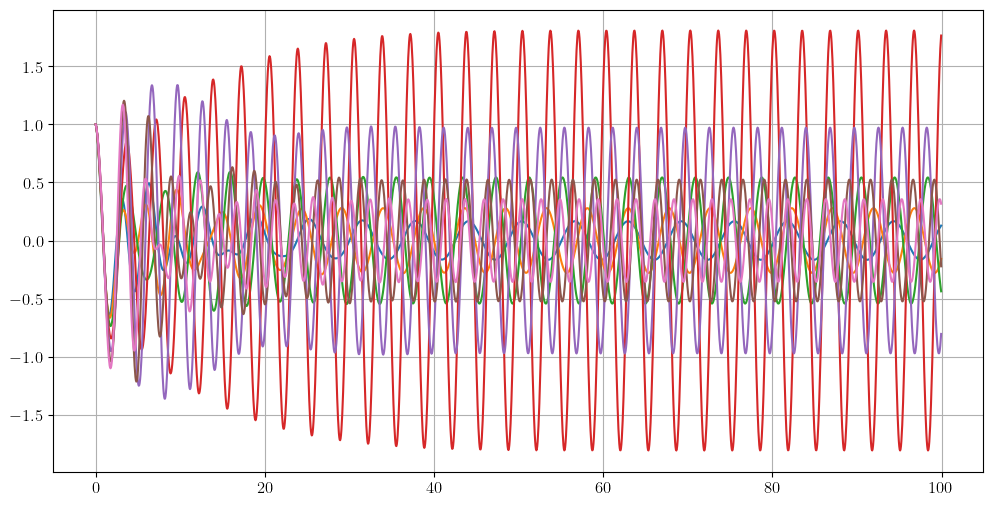

In [264]:
plt.figure(figsize=(12,6))
for i in range(len(sols)):
    t, y = sols[i]
    plt.plot(t, y[:,1])
    
plt.grid()
plt.show()

### Problema 4
Considere el siguiente sistema de ecuaciones diferenciales:

$$
\frac{dx}{dt} = 10(y - x)
$$

$$
\frac{dy}{dt} = x(28 - z) - y
$$

$$
\frac{dz}{dt} = xy - \frac{8}{3}z
$$

Realice una integración numérica del sistema con alguno de los integradores del Problema 1 y realice los siguientes ejercicios:

1. Elija una condición inicial aleatoria en $ x, y, z \in [-5, 5] $ y realice la gráfica de la solución en los planos $xy$, $xz$ y $yz$. Comente sus observaciones.
2. Proponga 3 condiciones iniciales donde solo la coordenada $y$ difiera en $10^{-2}$. Explique lo que observa.

**Nota**: De preferencia realice integraciones con tiempos relativamente largos para apreciar diferencias en el comportamiento de las soluciones. Asegure que cada solución sea convergente, encontrando un paso adecuado para la integración.


In [265]:
def edo_4(t, r):
    x, y, z = r
    dxdt = 10*(y - x)
    dydt = x*(28 - z) - y
    dzdt = x*y - (8.0/3.0)*z
    return np.array([dxdt, dydt, dzdt])

In [321]:
t0, tf = -30, 30
h = 0.001
y0 = np.array([1, -1,2]) # Puntos iniciales

t, sols = integrar_RK4(edo_4,t0, y0, tf, h)

-5.2375989636991065
-8.247304069851198
17.045997980549217


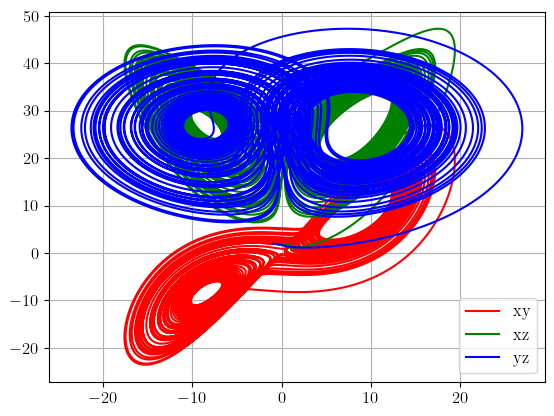

In [322]:
print(sols[-1,0])
print(sols[-1,1])
print(sols[-1,2])

plt.plot(sols[:, 0], sols[:, 1], color='r', label='xy')
plt.plot(sols[:, 0], sols[:, 2], color='g', label='xz')
plt.plot(sols[:, 1], sols[:, 2], color='b', label='yz')
plt.legend(), plt.grid()
plt.show()

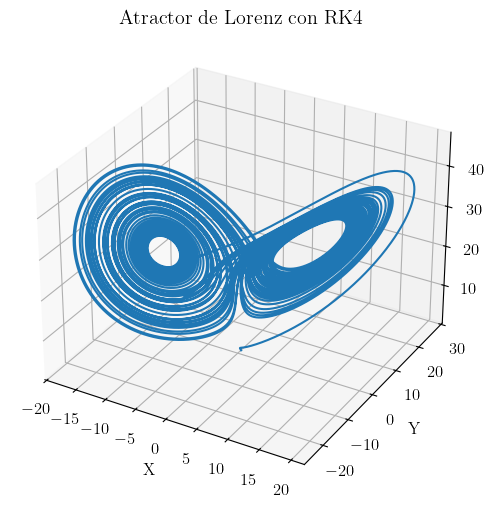

In [323]:
# Graficar la trayectoria
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(sols[:, 0], sols[:, 1], sols[:, 2])
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Atractor de Lorenz con RK4")
plt.show()


In [308]:
y0s = [
    np.array([1, 3.01,-2]),
    np.array([1, 2.99,-2]),
    np.array([1, 3.00,-2])
       ] # Puntos iniciales

sols = [integrar_RK4(edo_4, t0, ini, tf, h) for ini in y0s]

-9.72791302064477
-10.642549679213987
27.387471352471618


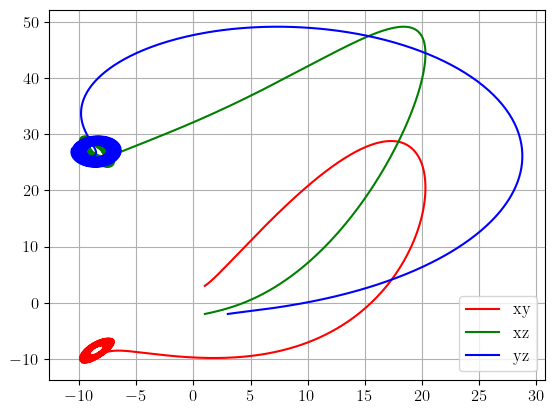

-9.72443353567744
-10.651755787185028
27.366076979308627


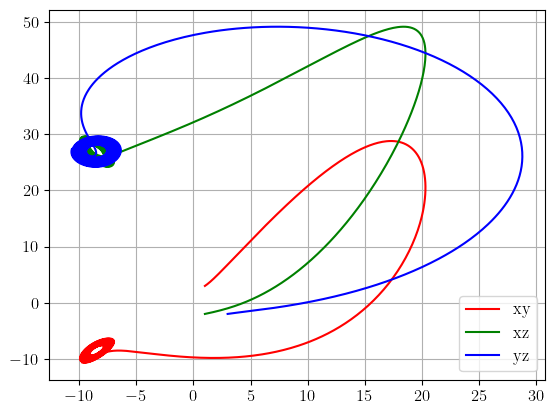

-9.726190545789258
-10.647168380118154
27.376802483415137


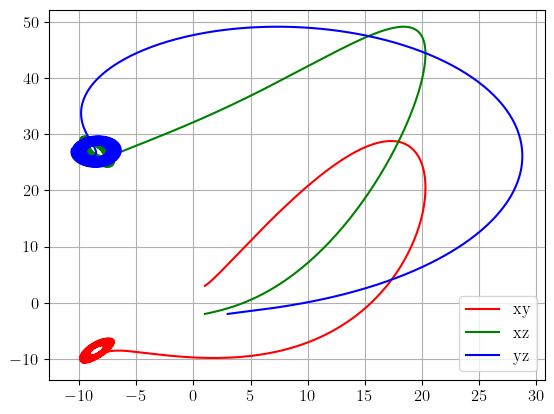

In [309]:
for tysol in sols:
    t, sol = tysol

    print(sol[-1,0])
    print(sol[-1,1])
    print(sol[-1,2])

    plt.plot(sol[:, 0], sol[:, 1], color='r', label='xy')
    plt.plot(sol[:, 0], sol[:, 2], color='g', label='xz')
    plt.plot(sol[:, 1], sol[:, 2], color='b', label='yz')
    plt.legend(), plt.grid()
    plt.show()